# CALIFORNIA HOUSING PRICES DATASET - DATA ANALYSIS

Perform Data Cleaning and Data Analysis of the California Housing Prices Dataset to find the relation between the housing prices at a block and the amenities and facilities stated in the dataset such as total number of rooms, ocean proximity etc.

DATASET SOURCE: https://www.kaggle.com/datasets/camnugent/california-housing-prices?datasetId=5227&searchQuery=data+anal

The data contains information on houses found in a given California district and statistics based on the 1990 census data.

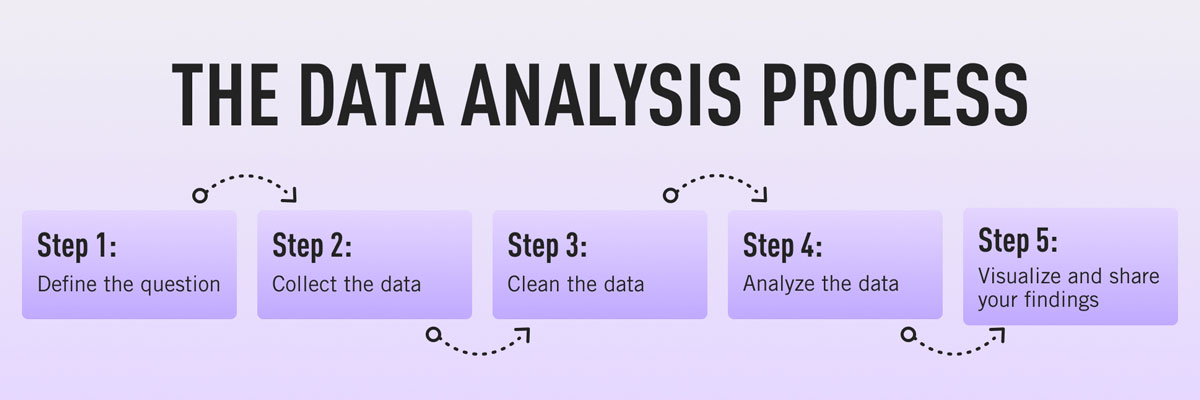

PARAMETERS IN DATASET COLUMNS

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10.oceanProximity: Location of the house w.r.t ocean/sea

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset
df = pd.read_csv('housing.csv')
#display dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#display unique values of ocean_proximity column
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## Data Cleaning

In [5]:
#count number of NaN and Inf values in each column
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df[df == np.inf].count()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
# remove Null values/NaN (Not a Number values)/infinite values to avoid outliers and errors in calculation
#since total_rooms is the column with NaN value, we cannot fill it with zero as a house cannot have zero rooms.
df = df.dropna(how='any',axis=0)
#verify whether rows/records with NaN values are removed
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Data Analysis and Visualisation

### Find the total population for each House Location based on Ocean Proximity

In [8]:
#extract popolution and ocean proximity columns from dataset
df1 = pd.DataFrame(df[['population','ocean_proximity']])

In [9]:
#display total population based on ocean proximity using groupby
df_grouped = pd.DataFrame(df.groupby(by="ocean_proximity")["population"].sum())
df_grouped = df_grouped.rename(columns ={'population':'total_population'})
df_grouped

,total_population
ocean_proximity,
<1H OCEAN,13717591.0
INLAND,9045105.0
ISLAND,3340.0
NEAR BAY,2787290.0
NEAR OCEAN,3562615.0


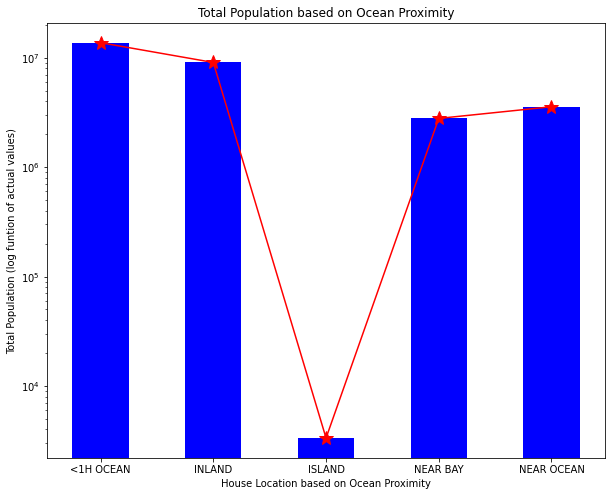

In [10]:
#plot bar graph for above data
#create figure for plotting
fig = plt.figure(figsize = (10, 8))

# creating the bar plot
#x = labels from ocean_proximity column
x = df_grouped.index
#y = total_population column values corresponding each ocean_promoxity label
y = df_grouped['total_population']

#use log function over y axis as it contains very small and very large values with great difference
plt.yscale('log')

#plot the bar graph
plt.bar(x,y, color ='blue',
        width = 0.5)

#display line graph over bar graph to further visualize the difference
plt.plot(y,color='red',marker="*",ms=15)

#display labels for the graph
plt.xlabel("House Location based on Ocean Proximity")
plt.ylabel("Total Population (log funtion of actual values)")
plt.title("Total Population based on Ocean Proximity")

#display plotted graph
plt.show()

Above graph shows that the population is higher in house locations <1H OCEAN

### Find the relation between median_income and median_house_value

In [12]:
#extract required columns from main DataFrame
df2 = pd.DataFrame(df[['median_income','median_house_value']])
df2

,median_income,median_house_value
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,1.7000,92300.0
20638,1.8672,84700.0


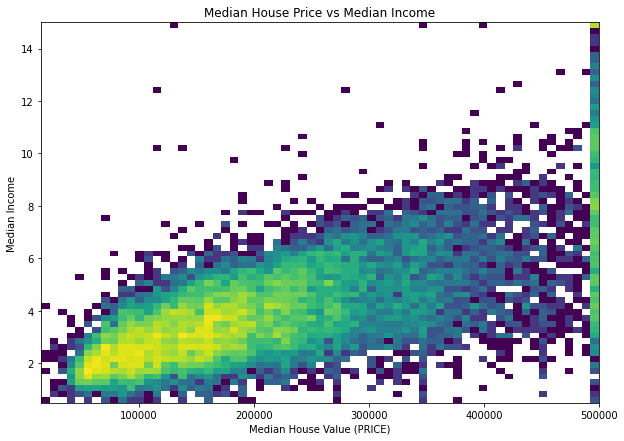

In [13]:
from matplotlib import colors

#create figure for plotting
fig2 = plt.figure(figsize = (10, 7))

x2 = df2['median_house_value']
y2 = df2['median_income']

#create 2D histogram
p = plt.hist2d(x2,y2,bins=65,norm = colors.LogNorm(),density="true")
#display labels for the graph
plt.xlabel("Median House Value (PRICE)")
plt.ylabel("Median Income")
plt.title("Median House Price vs Median Income")

plt.show()

The above graph shows that the median income is more concentrated between 2-4 range for a Median House value less than 200000. The graph has a positive correlation and hence shows that the two parameters, median_income and median_house_value are correlated.

### Find out whether housing_median_age and median_house_value are correlated using scatter plot.

In [16]:
#extract required columns from main DataFrame
df3 = pd.DataFrame(df[['housing_median_age','median_house_value']])
df3

,housing_median_age,median_house_value
0,41.0,452600.0
1,21.0,358500.0
2,52.0,352100.0
3,52.0,341300.0
4,52.0,342200.0
...,...,...
20635,25.0,78100.0
20636,18.0,77100.0
20637,17.0,92300.0
20638,18.0,84700.0


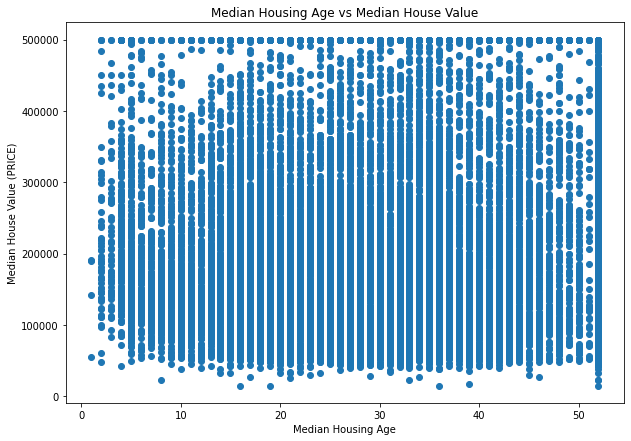

In [21]:
#create figure for plotting
fig3 = plt.figure(figsize = (10, 7))

x3 = df3['housing_median_age']
y3 = df3['median_house_value']

#create scatter plot
plt.scatter(x3,y3)
#display labels for the graph
plt.xlabel("Median Housing Age")
plt.ylabel("Median House Value (PRICE)")
plt.title("Median Housing Age vs Median House Value")

plt.show()

The above graph shows that there is no correlation between median_house_value and housing_median_age

### Find out the ocean proximity percentage for each housing location  type (label in the ocean_proximity column) using piechart

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64


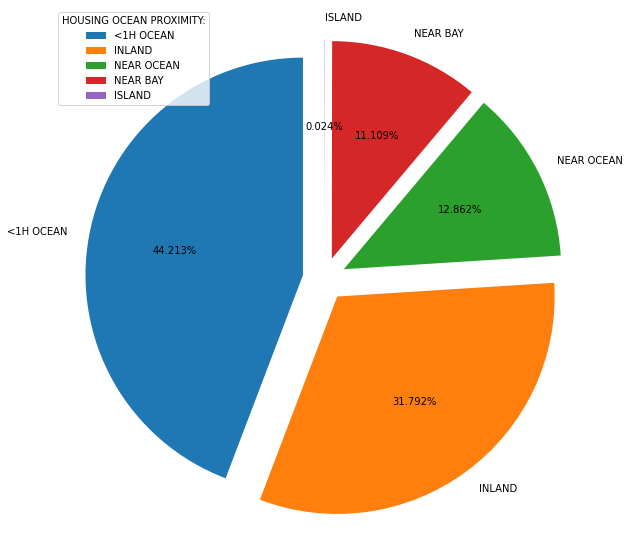

In [49]:
#create figure for graph
fig4 = plt.figure(figsize = (10, 10))
#count number of occurences for each label
vals = df['ocean_proximity'].value_counts()
print(vals)
#create a list of labels to display on pie chart
label = vals.index
#create pie chart
myexplode = [0.1, 0.1, 0.1, 0.1,0.1]
plt.pie(vals,labels=label, explode = myexplode, autopct='%.3f%%',
        shadow=False, startangle=90)
plt.legend(title = "HOUSING OCEAN PROXIMITY:")
plt.show()


The above Pie Chart shows that the housing location with highest percentage of houses is <1H OCEAN and the housing location with the lowest percentage of houses is ISLAND

### Find the range of building age within which most of the houses in the region lie.

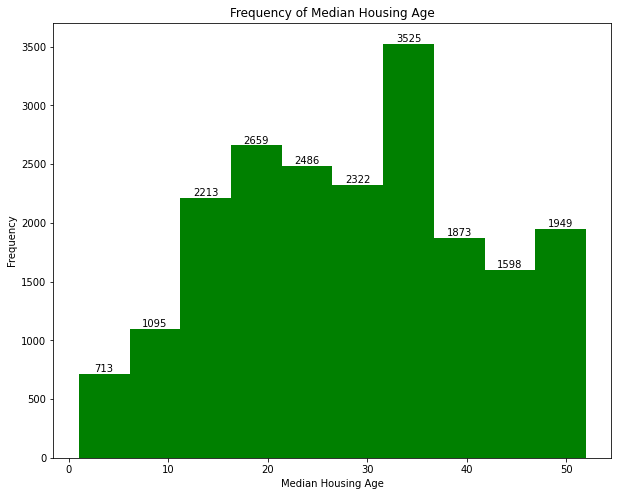

In [70]:
#create figure for graph
fig5 = plt.figure(figsize = (10, 8))

#create histogram
counts, edges, bars = plt.hist(df['housing_median_age'],bins=10,color='green')
#display labels for each bar with frequency
plt.bar_label(bars)

#display labels for the graph
plt.xlabel("Median Housing Age")
plt.ylabel("Frequency")
plt.title("Frequency of Median Housing Age")
plt.show()

The above graph shows that majority of the houses come within a building age of 30 to 35 approximately in California based on the frequency of housing_median_age column